In [5]:
import pandas as pd
df = pd.read_csv(r'C:\Users\shrey\Desktop\sample1.csv')
df.drop("Unnamed: 0",axis=1,inplace=True)
X = df.drop(columns=["status","Agent_id"],axis=1)
X_train_1 = pd.DataFrame()
for i in X.columns:
    X_train_1[i] = X[i].astype('category').cat.codes
X_train_1.corr()

,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
lost_reason,1.000000,0.045627,0.040571,0.018779,-0.038361,0.001626,-0.002565,0.016701,-0.041642,0.011066,0.053253,0.061347,-0.006486
budget,0.045627,1.000000,0.660399,0.246410,-0.318525,-0.011891,0.077804,-0.010666,-0.159711,-0.082085,0.089313,0.336465,-0.006605
lease,0.040571,0.660399,1.000000,0.208801,-0.391401,-0.069373,0.023466,0.052625,-0.183242,-0.076833,0.107491,0.251902,-0.008117
movein,0.018779,0.246410,0.208801,1.000000,-0.065721,-0.090239,-0.005271,0.104924,-0.113492,-0.052004,0.023486,0.158611,0.003607
source,-0.038361,-0.318525,-0.391401,-0.065721,1.000000,-0.151850,-0.132256,0.094098,0.158878,-0.015954,-0.122869,-0.107935,0.006312
source_city,0.001626,-0.011891,-0.069373,-0.090239,-0.151850,1.000000,0.249763,-0.229433,0.078454,0.110265,0.036997,-0.116776,-0.004512
source_country,-0.002565,0.077804,0.023466,-0.005271,-0.132256,0.249763,1.000000,-0.130219,-0.075098,-0.040329,0.123528,-0.010712,-0.001785
utm_source,0.016701,-0.010666,0.052625,0.104924,0.094098,-0.229433,-0.130219,1.000000,-0.122034,-0.060723,0.034150,0.160376,0.008884
utm_medium,-0.041642,-0.159711,-0.183242,-0.113492,0.158878,0.078454,-0.075098,-0.122034,1.000000,0.032823,-0.260739,-0.151856,-0.004318
des_city,0.011066,-0.082085,-0.076833,-0.052004,-0.015954,0.110265,-0.040329,-0.060723,0.032823,1.000000,0.109626,-0.084480,-0.001402


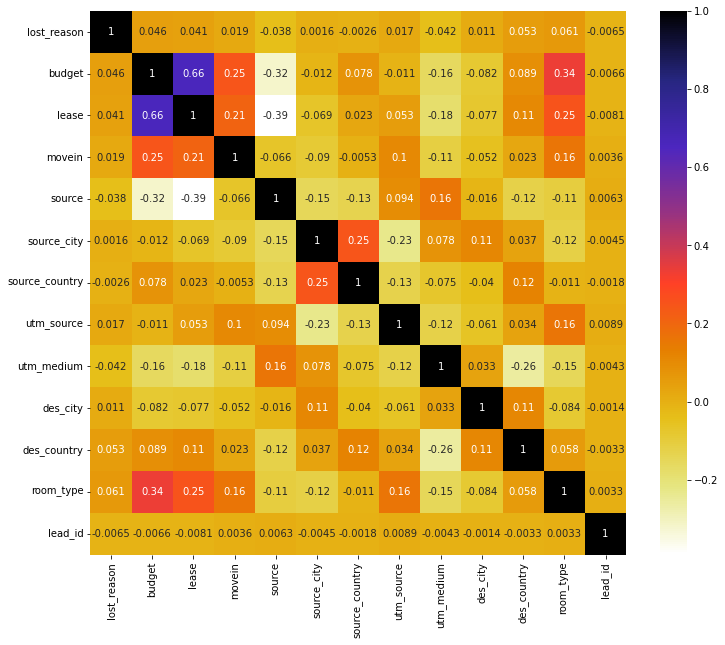

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train_1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
corr_features = correlation(X_train_1, 0.5)
len(set(corr_features))